# XHEC: Session 6-2  

Explore topic extraction and sentiment analysis existing libraries 

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import os
os.chdir("drive/MyDrive/X-HEC Course 5/")

In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 10.1MB 46.5MB/s 
     |████████████████████████████████| 24.2MB 1.5MB/s 
     |████████████████████████████████| 1.6MB 43.8MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 1.3MB 40.5MB/s 
     |████████████████████████████████| 450kB 31.0MB/s 
     |████████████████████████████████| 1.5MB 37.1MB/s 
     |████████████████████████████████| 225kB 48.6MB/s 
     |████████████████████████████████| 13.1MB 20.3MB/s 
     |████████████████████████████████| 890kB 46.9MB/s 
     |████████████████████████████████| 1.1MB 42.7MB/s 
     |████████████████████████████████| 2.9MB 46.9MB/s 
     |████████████████████████████████| 798kB 38.9MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 19.7MB 1.2MB/s 
     |████████████████████████████████| 983kB 40.2MB

## Import libraries 

In [3]:
!git clone https://github.com/rwalk/gsdmm
#pip install transformers==2.4.1
#pip install flair

fatal: destination path 'gsdmm' already exists and is not an empty directory.


In [4]:
import os
import numpy as np
import pandas as pd
import pickle
import gensim
import gensim.corpora as corpor
import pyLDAvis.gensim
import pyLDAvis
from gsdmm.gsdmm import MovieGroupProcess
from gensim.models.coherencemodel import CoherenceModel
import operator
from tqdm import tqdm_notebook as tqdm
import flair
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/usr/local/lib/python3.7/dist-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence, defaultdict
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
nltk.download('vader_lexicon')
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


2021-02-26 10:05:16,636 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_3.1.pt not found in cache, downloading to /tmp/tmpkimesaap


100%|██████████| 266147697/266147697 [00:27<00:00, 9603119.08B/s]

2021-02-26 10:05:45,209 copying /tmp/tmpkimesaap to cache at /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


2021-02-26 10:05:45,650 removing temp file /tmp/tmpkimesaap
2021-02-26 10:05:45,689 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


## Load data 

In [6]:
document = pickle.load(open('comments_subsample.pkl', "rb" ))

In [7]:
document.head()

,id_resto,id_comment,resto,rating,title,diner_date,rating_date,other_ratings_category,other_ratings_value,content,clean_content
0,g528819-d10162972,g528819-d10162972-r738854398,Stella_s_Portuguese_Cafe_and_Restaurant,5,AMAZING!!! Can’t recommend it enough.,December 2019,2020-01-13,"[Value, Service, Food]","[50, 50, 50]",The service and food is amazing. This is defin...,"[amaz, definit, hidden, gem, everyth, cook, sc..."
1,g186338-d1059621,g186338-d1059621-r738889879,Orsini_Ristorante,4,Convenient position,December 2019,2020-01-13,[],[],Conveniently placed for the V and A and not to...,"[conveni, place, far, royal, albert, hall, ext..."
2,g2280590-d12084587,g2280590-d12084587-r738886825,The_City_Arms,2,Expensive,January 2020,2020-01-13,"[Value, Service, Food]","[20, 20, 30]",As this a just a pub and not a restaurant you ...,"[pub, would, expect, pub, price, price, expens..."
3,g186338-d2441081,g186338-d2441081-r738902402,The_Vincent_Rooms_Brasserie_The_Escoffier_Room,5,Outstanding!,January 2020,2020-01-13,"[Value, Service, Food]","[50, 50, 50]","Wonderful food, service and hospitality. Havin...","[wonder, hospit, eaten, sever, time, brasseri,..."
4,g186338-d17728520,g186338-d17728520-r738955011,Hard_Rock_Cafe_Piccadilly_Circus,5,Lovely time spent in HRC PC,January 2020,2020-01-13,[],[],"Beautiful evening, lovely food and great beer ...","[beauti, even, love, beer, host, fabio, take, ..."


## Topic extraction 

### LDA with gensim 

In [8]:
#Dictionary
tokens = document.clean_content
dictionary = gensim.corpora.Dictionary(tokens)
dictionary.filter_extremes(no_below=0.05, no_above=0.9)
corpus = [dictionary.doc2bow(tok) for tok in tokens]

In [9]:
ldaModel = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=42,
                                           alpha=0.1,
                                           eta=0.1,
                                           per_word_topics=True)

In [10]:
for i,topic in ldaModel.show_topics(formatted=True, num_topics=10, num_words=20):
    print(str(i)+": "+ topic+"\n")

0: 0.020*"love" + 0.019*"birthday" + 0.018*"sunday" + 0.016*"lunch" + 0.014*"excel" + 0.013*"meal" + 0.013*"staff" + 0.013*"even" + 0.012*"dinner" + 0.012*"roast" + 0.012*"wonder" + 0.009*"celebr" + 0.008*"thank" + 0.008*"famili" + 0.008*"enjoy" + 0.008*"parti" + 0.007*"delici" + 0.007*"perfect" + 0.007*"special" + 0.007*"atmospher"

1: 0.023*"pub" + 0.015*"chicken" + 0.014*"dish" + 0.013*"nice" + 0.008*"order" + 0.008*"beer" + 0.008*"tast" + 0.007*"menu" + 0.007*"meat" + 0.007*"lamb" + 0.007*"starter" + 0.007*"love" + 0.007*"curri" + 0.006*"thai" + 0.006*"tasti" + 0.006*"also" + 0.006*"place" + 0.006*"tri" + 0.006*"portion" + 0.006*"main"

2: 0.027*"love" + 0.026*"staff" + 0.022*"friendli" + 0.022*"amaz" + 0.022*"recommend" + 0.016*"atmospher" + 0.016*"place" + 0.013*"visit" + 0.013*"realli" + 0.013*"excel" + 0.013*"delici" + 0.012*"definit" + 0.012*"fantast" + 0.011*"nice" + 0.011*"friend" + 0.010*"back" + 0.009*"would" + 0.009*"highli" + 0.009*"help" + 0.008*"us"

3: 0.028*"breakfas

In [11]:
cm = CoherenceModel(model=ldaModel, corpus=corpus, texts=tokens ,coherence="c_v")
cm.get_coherence()

0.4608692484281316

In [12]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldaModel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.172228  0.073895       1        1  20.684725
8      0.010045  0.027942       2        1  14.482585
2     -0.136041  0.049116       3        1  14.184445
1      0.025155 -0.066896       4        1  10.116466
7      0.059758  0.015212       5        1   9.127227
9     -0.136145 -0.043582       6        1   8.108185
0     -0.137962  0.091720       7        1   7.558568
5      0.108886  0.081987       8        1   6.184207
3     -0.002181 -0.014521       9        1   5.772074
6      0.036256 -0.214873      10        1   3.781518, topic_info=           Term         Freq        Total Category  logprob  loglift
1          amaz  5096.000000  5096.000000  Default  30.0000  30.0000
183        fish  1616.000000  1616.000000  Default  29.0000  29.0000
1266  breakfast  1555.000000  1555.000000  Default  28.0000  28.0000
52          pub  2699.000000  2699.000000  Default  27.0000  27.0000
638         tea  1369.000000  1369.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
344       excel   235.823044  5734.397461  Topic10  -4.9469   0.0839
383       order   226.895752  4528.601562  Topic10  -4.9855   0.2814
77         time   229.019333  6400.622559  Topic10  -4.9762  -0.0553
223       steak   194.979858  2078.946289  Topic10  -5.1371   0.9083
39        place   188.327713  7482.763184  Topic10  -5.1718  -0.4071

[834 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
104       1  0.096971   absolut
104       2  0.067324   absolut
104       3  0.473119   absolut
104       4  0.045088   absolut
104       5  0.035206   absolut
...     ...       ...       ...
4292      2  0.027078  yorkshir
4292      4  0.108311  yorkshir
4292      7  0.848437  yorkshir
4758      7  0.982449      youv
7317      7  0.988388      zaza

[2951 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 3, 2, 8, 10, 1, 6, 4, 7])

In [ ]:
#with open(f'model/lda_model.pkl', 'wb') as f:
#    pickle.dump(ldaModel, f)
#    f.close()

### GSDMM 

In [13]:
document['nb_token'] = list(map(len, document['clean_content']))
docs = document.clean_content.to_list()
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)

In [14]:
nb_topic = 10
alpha = 0.1
beta = 0.1

mgpModel = MovieGroupProcess(K=nb_topic, alpha=alpha, beta=beta, n_iters=20)
mgpModelFit = mgpModel.fit(tokens, n_terms)

# Save model
#with open(f'model/gsdmm_model.pkl', 'wb') as f:
#    pickle.dump(mgpModel, f)
#    f.close()

In stage 0: transferred 25100 clusters with 10 clusters populated
In stage 1: transferred 15419 clusters with 10 clusters populated
In stage 2: transferred 9103 clusters with 10 clusters populated
In stage 3: transferred 6359 clusters with 10 clusters populated
In stage 4: transferred 5080 clusters with 10 clusters populated
In stage 5: transferred 4336 clusters with 10 clusters populated
In stage 6: transferred 3925 clusters with 10 clusters populated
In stage 7: transferred 3716 clusters with 10 clusters populated
In stage 8: transferred 3470 clusters with 10 clusters populated
In stage 9: transferred 3279 clusters with 10 clusters populated
In stage 10: transferred 3209 clusters with 10 clusters populated
In stage 11: transferred 3133 clusters with 10 clusters populated
In stage 12: transferred 3108 clusters with 10 clusters populated
In stage 13: transferred 3055 clusters with 10 clusters populated
In stage 14: transferred 3064 clusters with 10 clusters populated
In stage 15: trans

In [ ]:
def topWordsPerTopic(clusterDistrib, topIndex, nbWord):
    for index in topIndex:
        clusterWord = clusterDistrib[index]
        sortedCluster = sorted(clusterWord.items(), key=operator.itemgetter(1), reverse=True)
        clusterTopWords = sortedCluster[:nbWord]
        print(f"Cluster {index} : {clusterTopWords}")
        print('*'*20)

In [ ]:
docCount = np.array(mgpModel.cluster_doc_count)
print('Number of documents per topic :', docCount)
print('*'*20)
# Topics sorted by the number of document they are allocated to
topIndex = docCount.argsort()[::-1]
print('Most important clusters (by number of docs inside):', topIndex)
print('*'*20)
# Show the top 30 words in term frequency for each cluster 
topWordsPerTopic(mgpModel.cluster_word_distribution, topIndex, 30)

Number of documents per topic : [1574 3277 2113 2918 2677 3497 3143 2915 2603 5280]
********************
Most important clusters (by number of docs inside): [9 5 1 6 3 7 4 8 2 0]
********************
Cluster 9 : [('tabl', 2822), ('us', 2417), ('order', 2410), ('staff', 2054), ('time', 1992), ('wait', 1687), ('ask', 1645), ('one', 1614), ('would', 1544), ('arriv', 1411), ('even', 1377), ('place', 1367), ('drink', 1352), ('go', 1337), ('book', 1331), ('meal', 1237), ('get', 1190), ('disappoint', 1096), ('menu', 1093), ('back', 1079), ('came', 1071), ('visit', 1070), ('bar', 1062), ('manag', 1045), ('like', 1020), ('realli', 1010), ('minut', 1002), ('experi', 958), ('didnt', 952), ('went', 923)]
********************
Cluster 5 : [('love', 984), ('staff', 967), ('bar', 903), ('excel', 898), ('visit', 833), ('meal', 775), ('lunch', 775), ('place', 770), ('brasseri', 692), ('menu', 672), ('friendli', 668), ('nice', 640), ('steak', 635), ('dinner', 627), ('time', 626), ('atmospher', 607), ('us

### pyLDAvis with gsdmm

In [ ]:
#Topic-term matrix shape (n_topic, n_term)
def createTopicTermMatrix(vocab, mgp):
    zero = np.zeros((len(mgp.cluster_word_distribution), len(vocab)))
    df = pd.DataFrame(data=zero, columns=list(vocab))
    for i, cluster_word_distrib in tqdm(enumerate(mgp.cluster_word_distribution)):
        for key, val in cluster_word_distrib.items():
            df.loc[i, key] = val
    return df

In [ ]:
TopicTermMatrix = createTopicTermMatrix(vocab, mgpModel)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [ ]:
#Matrix of document-topic probabilities shape (n_doc, n_topics)
def createDocumentTopicProbaMatrix(mgp, doc_list):
    score_per_doc = []
    for doc in tqdm(doc_list):
        score_per_doc.append(mgp.score(doc))
    df = pd.DataFrame(data=score_per_doc, columns=[i for i in range(nb_topic)])
    return df

In [ ]:
probaDocumentTopicMatrix = createDocumentTopicProbaMatrix(mgpModel, docs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
def deleteNonPorcessedDocument(probaDocumentTopicMatrix, document):
    check = probaDocumentTopicMatrix.sum(axis=1)
    toDelete = check[check==0]
    idxToDelete = toDelete.index 
    probaDocumentTopicMatrix = probaDocumentTopicMatrix.drop(idxToDelete)
    
    idx = list(map(lambda x: document.index[x], idxToDelete))
    document = document.drop(idx)
    return probaDocumentTopicMatrix, document

In [ ]:
probaDocumentTopicMatrixClean, documentClean = deleteNonPorcessedDocument(probaDocumentTopicMatrix, document)

In [ ]:
#doc length shape (n_doc)
docLength = documentClean.nb_token
print(len(documentClean))

29527


In [ ]:
#doc length shape (n_term)
vocabList = list(vocab) 

In [ ]:
#Term frequency shape (n_term)
def TermFrequency(vocab_list, doc_list):
    res = []
    for word in tqdm(vocab_list):
        word_per_doc = sum(list(map(lambda x: x.count(word), doc_list)))
        res.append(word_per_doc)
    return res

In [ ]:
termFrequencyList = TermFrequency(vocabList, docs)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
%%time
vis = pyLDAvis.prepare(TopicTermMatrix, probaDocumentTopicMatrixClean, docLength, vocabList, termFrequencyList, sort_topics=False)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


CPU times: user 22.9 s, sys: 387 ms, total: 23.3 s
Wall time: 27.7 s


## Sentiment analysis 

In [ ]:
i_comment = 0

sentence = document.content[i_comment]

/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sentence

/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'The service and food is amazing. This is definitely a hidden gem. As everything is cooked from scratch you have to wait for your food but it is worth it. There is something for everyone and the portions are very generous. They also do take away which I tend to get after having had a meal there as it’s a 45 minute drive away. '

### VADER Sentiment analysis 

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.8883}

In [ ]:
sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


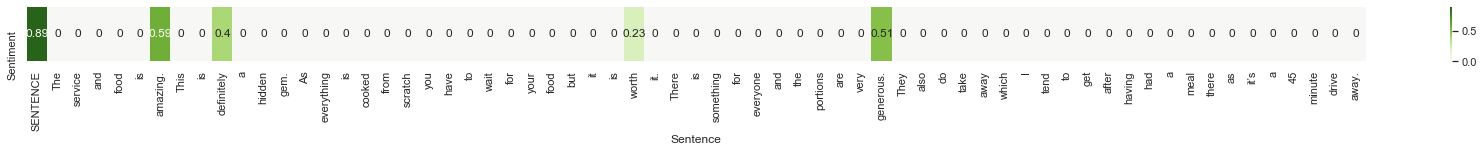

In [ ]:
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

### Flair Sentiment analysis 

In [ ]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/flair/embeddings.py:355: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  word_embedding, device=flair.device, dtype=torch.float


[POSITIVE (0.9613412618637085)]

/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


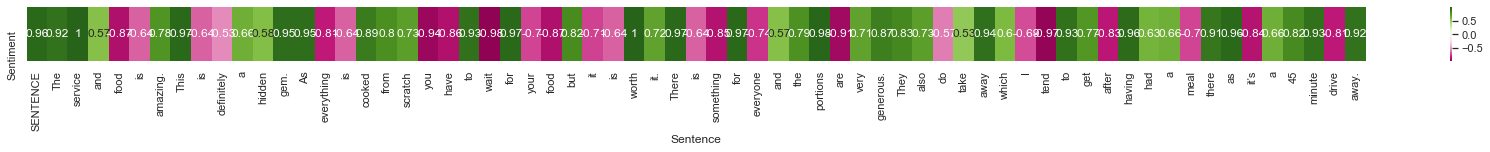

In [ ]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

### Rating vs Sentiment score 

#### Vader

In [ ]:
document['vader_score'] = document.content.map(lambda x: sid.polarity_scores(x)['compound'])

/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/ziadNader/Desktop/Projects/X-HEC/xhec/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


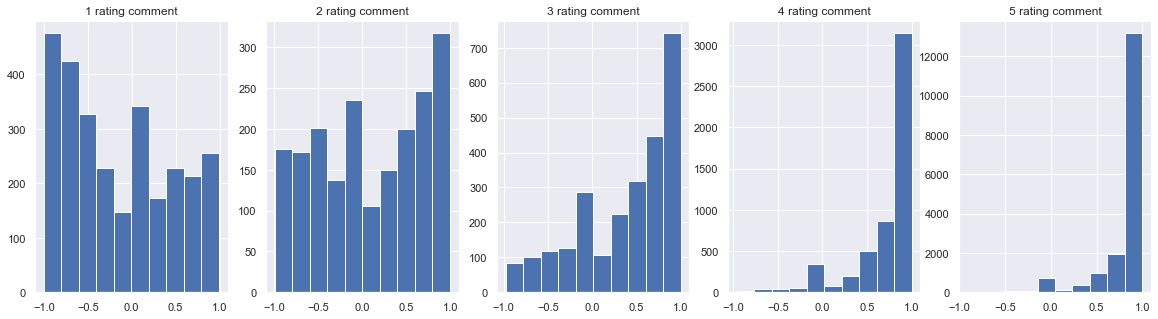

In [ ]:
f = plt.figure(figsize=(20, 5))
for i in range(5):
    rating_doc = document[document['rating']==i+1]
    plt.subplot(1, 5, i+1)
    plt.title(f'{i+1} rating comment')
    rating_doc.vader_score.hist()
plt.show()